#### Exercise 2
# Binary Classification using Naive Bayes and K-Nearest Neighbors
### UCS2612  Machine Learning Algorithms Laboratory


##### Name: Meghna Manimaran 
##### Reg no: 3122235001079

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import math
from matplotlib import rcParams
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

rcParams['font.weight']='bold'
rcParams['font.size']=15
rcParams['axes.labelweight']='bold'
rcParams['axes.titleweight']='bold'
rcParams['xtick.labelsize']=15
rcParams['ytick.labelsize']=15
from sklearn.model_selection import learning_curve

import warnings; warnings.filterwarnings("ignore", message="findfont:")

**Data Importing and Preprocessing**

In [274]:
df=pd.read_csv("spambase_csv_Kaggle.csv")
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [275]:
df.head()
df.info()
df.describe()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

(4601, 58)

In [276]:
df=df.drop_duplicates()
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


**Class Distribution**

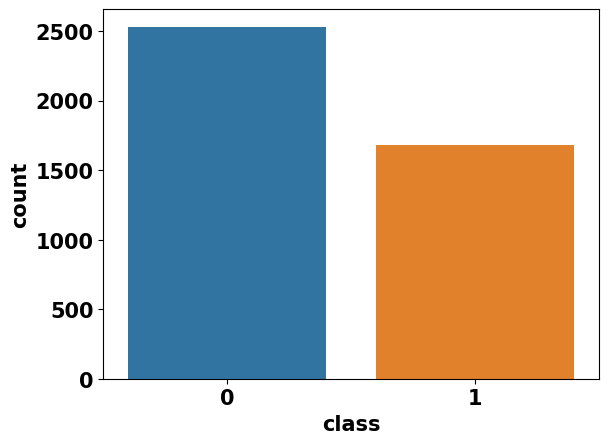

In [280]:
sns.countplot(data=df,x="class")

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.show()

**Feature Distribution (EDA Subplots)**




**Histogram**

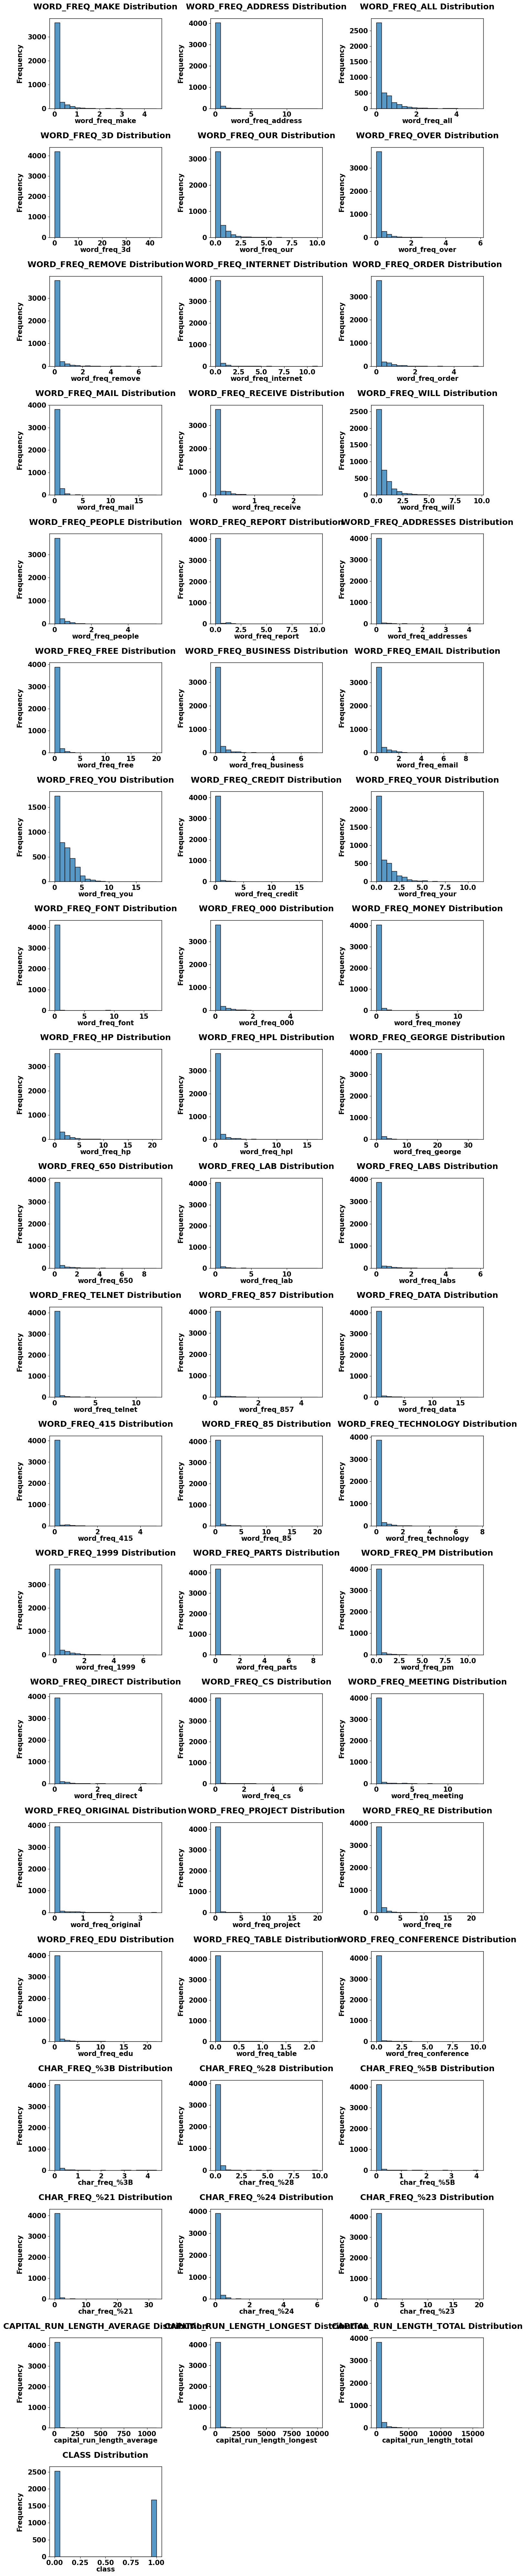

In [284]:

import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

df = df.select_dtypes(include='number').replace([np.inf, -np.inf], np.nan)

cols = df.columns
ncols = 3
nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4 * nrows))
axes = axes.flatten()

bxwidth = 1

for i, col in enumerate(cols):
    sns.histplot(df[col], bins=20, ax=axes[i])
    axes[i].set_title(f"{col.upper()} Distribution", pad=20)
    axes[i].set_xlabel(col, labelpad=0)
    axes[i].set_ylabel("Frequency", labelpad=10)
    for spine in axes[i].spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=1.5, wspace=1.3)
plt.tight_layout()


plt.show()


**BoxPlot**

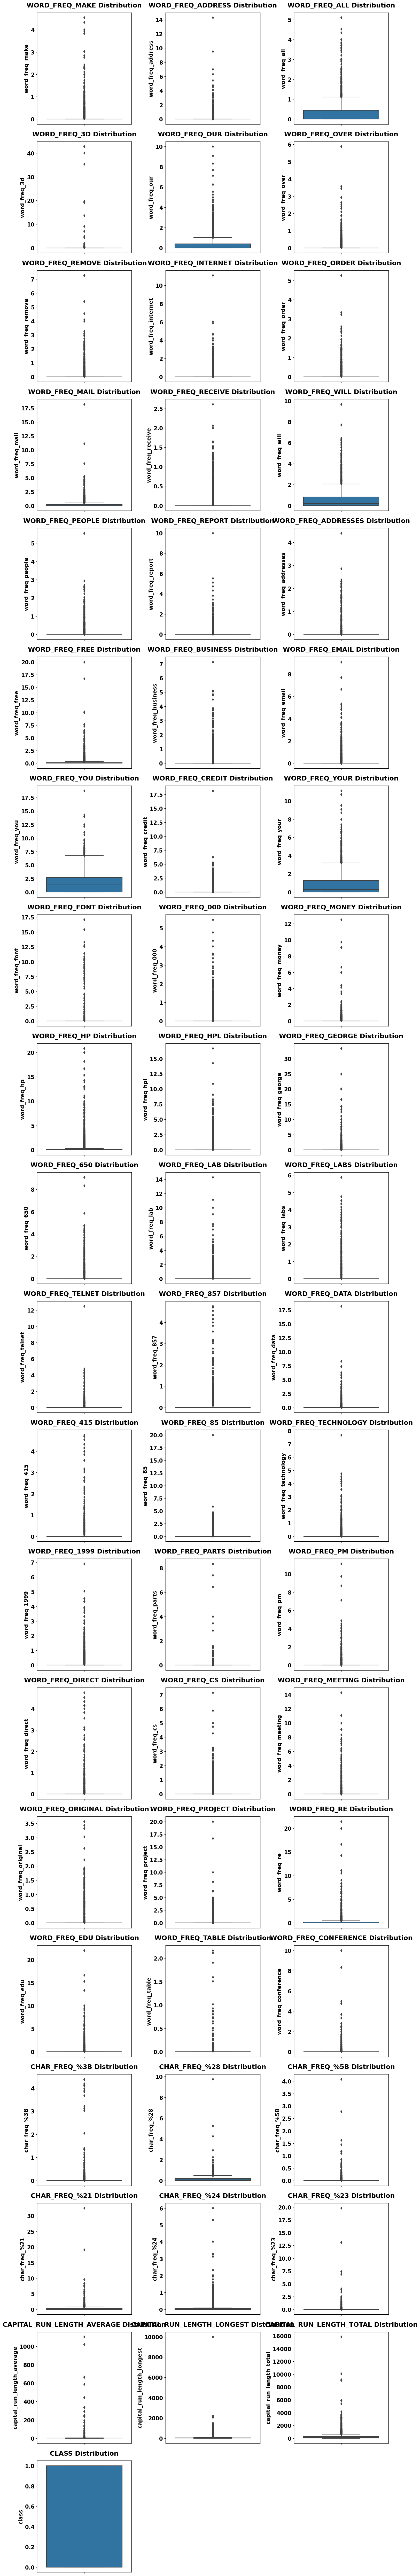

In [285]:
warnings.filterwarnings("ignore", message="findfont:")

cols = df.columns
ncols = 3
nrows = math.ceil(len(cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

bxwidth = 1

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f"{col.upper()} Distribution", pad=15)
    axes[i].set_ylabel(col)
    for spine in axes[i].spines.values():
        spine.set_linewidth(bxwidth)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(hspace=1.2, wspace=0.8)
plt.tight_layout()
plt.show()


**Correlation Matrix**

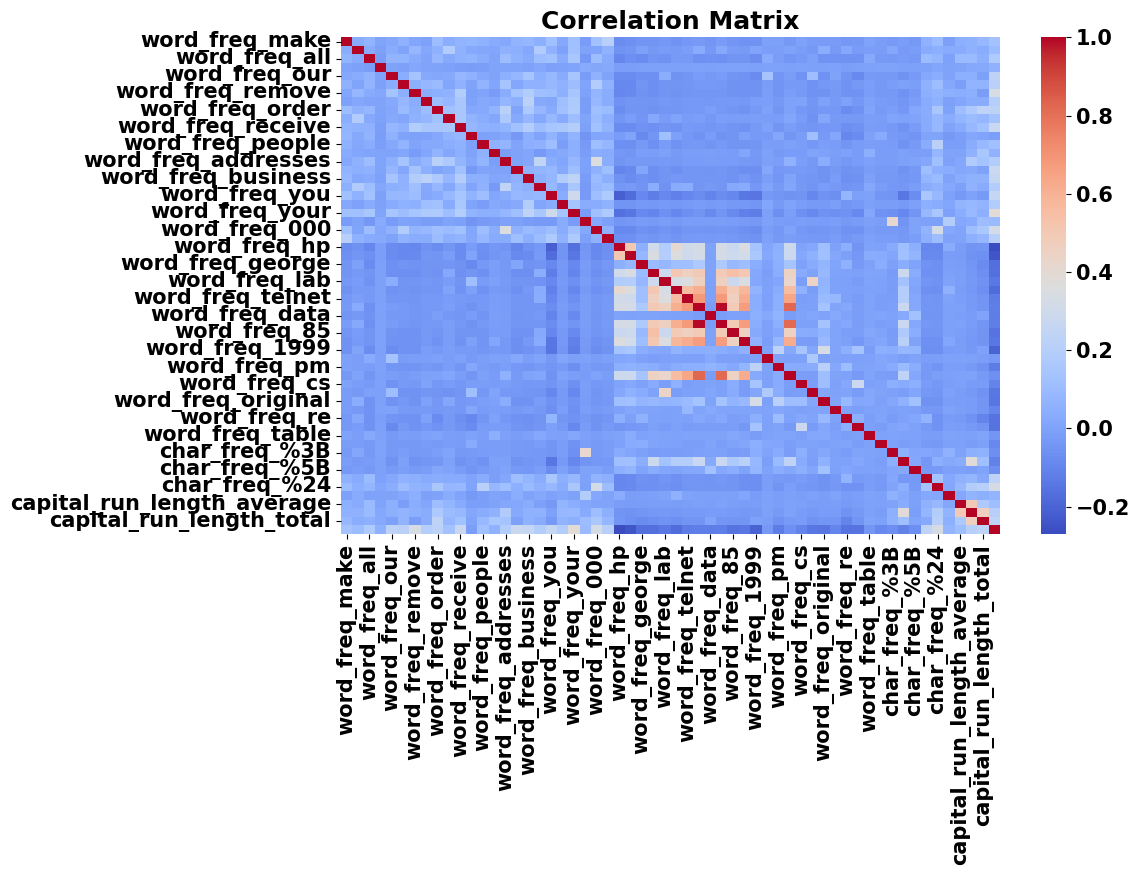

In [286]:
plt.figure(figsize=(12,9))
sns.heatmap(df[cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



**Train-Test Split**

In [210]:
X=df.drop("class",axis=1)
print(X)
y=df["class"]
print(y)


      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

**Scaling Data**

In [211]:
x_scaled=StandardScaler().fit_transform(df)
x_scaled

array([[-0.34792164,  1.16102457,  0.67588944, ...,  0.04439849,
        -0.02130997,  1.22778048],
       [ 0.3521501 ,  0.3684328 ,  0.40439129, ...,  0.24484101,
         1.1911417 ,  1.22778048],
       [-0.14790114, -0.24802746,  0.81163851, ...,  2.16908914,
         3.18117903,  1.22778048],
       ...,
       [ 0.65218084, -0.24802746,  0.01653679, ..., -0.23120996,
        -0.27996632, -0.81447785],
       [ 2.85240628, -0.24802746, -0.56524496, ..., -0.23622103,
        -0.34463041, -0.81447785],
       [-0.34792164, -0.24802746,  0.69528216, ..., -0.23622103,
        -0.40606129, -0.81447785]])

In [212]:
X=df.drop("class",axis=1)
X
y=df["class"]

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, random_state=42,stratify=y
)

In [214]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Naive Bayes**

**GaussianNB**

In [215]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import time
start=time.time()
gnb=GaussianNB()
gnb.fit(X_train_scaled, y_train)
ttgnb=time.time()-start
start = time.time()
y_pred = gnb.predict(X_test_scaled)
pred_time_gnb = time.time() - start


In [216]:
print("The training time for Gaussian Naive Bayes is: ",ttgnb)

The training time for Gaussian Naive Bayes is:  0.004602909088134766


In [217]:
print("The prediction time for Gaussian Naive Bayes is: ",pred_time_gnb)

The prediction time for Gaussian Naive Bayes is:  0.0008082389831542969


In [218]:
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score,
confusion_matrix, classification_report, roc_auc_score,
roc_curve, average_precision_score)

**Accuracy**

In [219]:
accuracy_score(y_test,y_pred)

0.8300094966761633

**Precision**

In [220]:
precision_score(y_test,y_pred)

0.714795008912656

**Recall**

In [221]:
recall_score(y_test,y_pred)

0.9547619047619048

**F1 Score**

In [222]:
f1_score(y_test,y_pred)

0.8175331294597349

**Confusion Matrix**

In [223]:

print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
print("Specificity:", specificity)
false_positive_rate = fp / (fp + tn)
print("False Positive Rate:", false_positive_rate)

Confusion matrix is 
 [[473 160]
 [ 19 401]]
Specificity: 0.7472353870458136
False Positive Rate: 0.2527646129541864


**Classification Report**

In [224]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.96      0.75      0.84       633
           1       0.71      0.95      0.82       420

    accuracy                           0.83      1053
   macro avg       0.84      0.85      0.83      1053
weighted avg       0.86      0.83      0.83      1053



**Multinomial NB**

In [225]:
start=time.time()
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
ttmnb=time.time()-start
start=time.time()
y_pred=mnb.predict(X_test)
pred_time=time.time()-start

In [226]:
print("The training time for Multinomial Naive Bayes is: ",ttmnb)

The training time for Multinomial Naive Bayes is:  0.018388032913208008


In [227]:
print("The prediction time for Multinomial Naive Bayes is: ",pred_time)

The prediction time for Multinomial Naive Bayes is:  0.0021927356719970703


**Accuracy Score**

In [228]:
accuracy_score(y_test,y_pred)

0.7939221272554606

**Precision**

In [229]:
precision_score(y_test,y_pred)

0.7780821917808219

**Recall**

In [230]:
recall_score(y_test,y_pred)

0.6761904761904762

**F1 Score**

In [231]:
f1_score(y_test,y_pred)

0.7235668789808917

**Confusion Matrix**

In [232]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
print("Specificity:", specificity)
false_positive_rate = fp / (fp + tn)
print("False Positive Rate:", false_positive_rate)

Confusion matrix is 
 [[552  81]
 [136 284]]
Specificity: 0.8720379146919431
False Positive Rate: 0.12796208530805686


**Classification Report**

In [233]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.80      0.87      0.84       633
           1       0.78      0.68      0.72       420

    accuracy                           0.79      1053
   macro avg       0.79      0.77      0.78      1053
weighted avg       0.79      0.79      0.79      1053



**Bernoulli NB**

In [234]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
start=time.time()
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
ttbnb=time.time()-start
start=time.time()
y_pred = bnb.predict(X_test)
pred_time=time.time()-start

In [235]:
print("The training time for Bernoulli Naive Bayes is: ",ttbnb)

The training time for Bernoulli Naive Bayes is:  0.17898917198181152


In [236]:
print("The prediction time for Bernoulli Naive Bayes is: ",pred_time)

The prediction time for Bernoulli Naive Bayes is:  0.004274129867553711


Accuracy

In [237]:
accuracy_score(y_test,y_pred)

0.8879392212725546

**Precision**

In [238]:
precision_score(y_test,y_pred)

0.8719211822660099

**Recall**

In [239]:
recall_score(y_test,y_pred)

0.8428571428571429

**F1 Score**

In [240]:
f1_score(y_test,y_pred)

0.8571428571428572

**Confusion Matrix**

In [241]:
print("Confusion matrix is \n",confusion_matrix(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

specificity = tn / (tn + fp)
print("Specificity:", specificity)
false_positive_rate = fp / (fp + tn)
print("False Positive Rate:", false_positive_rate)

Confusion matrix is 
 [[581  52]
 [ 66 354]]
Specificity: 0.9178515007898894
False Positive Rate: 0.08214849921011058


**Classification Report**

In [242]:
print("Overall Report of model \n\n",classification_report(y_test,y_pred))

Overall Report of model 

               precision    recall  f1-score   support

           0       0.90      0.92      0.91       633
           1       0.87      0.84      0.86       420

    accuracy                           0.89      1053
   macro avg       0.88      0.88      0.88      1053
weighted avg       0.89      0.89      0.89      1053



**ROC Curve for NaiveBayes**

In [243]:
y_prob_gnb=gnb.predict_proba(X_test_scaled)[:,1]
y_prob_mnb=mnb.predict_proba(X_test)[:,1]
y_prob_bnb=bnb.predict_proba(X_test)[:,1]

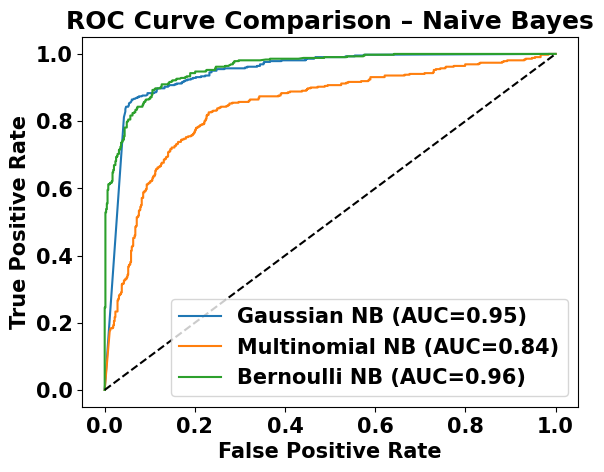

In [287]:
fpr_gnb,tpr_gnb,_=roc_curve(y_test,y_prob_gnb)
fpr_mnb,tpr_mnb,_=roc_curve(y_test,y_prob_mnb)
fpr_bnb,tpr_bnb,_=roc_curve(y_test,y_prob_bnb)
auc_gnb=auc(fpr_gnb,tpr_gnb)
auc_mnb=auc(fpr_mnb,tpr_mnb)
auc_bnb=auc(fpr_bnb,tpr_bnb)
plt.plot(fpr_gnb,tpr_gnb,label=f'Gaussian NB (AUC={auc_gnb:.2f})')
plt.plot(fpr_mnb,tpr_mnb,label=f'Multinomial NB (AUC={auc_mnb:.2f})')
plt.plot(fpr_bnb,tpr_bnb,label=f'Bernoulli NB (AUC={auc_bnb:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison – Naive Bayes")
plt.legend()
plt.show()

**KNN**

**Basic Model**

In [245]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
y_pred_knn=knn.predict(X_test_scaled)

**Accuracy vs K plot**

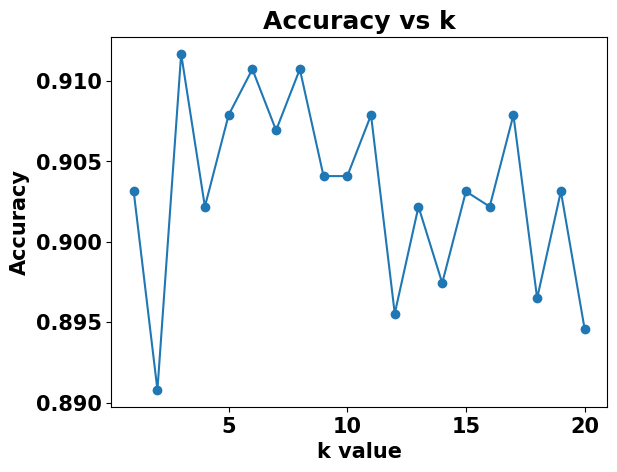

In [288]:
k_values = range(1, 21)
accuracies = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  accuracies.append(knn.score(X_test_scaled, y_test))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

**Stratified K-Fold**

In [247]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
cv_scores_base=cross_val_score(
    knn,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)
print("Base KNN CV Accuracy:",cv_scores_base.mean())



Base KNN CV Accuracy: 0.8777252301951896


**Grid Search**

In [248]:
param_grid = {
    'n_neighbors': list(range(1, 31, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(
    knn,
    param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)

best_k = grid.best_params_['n_neighbors']

print("Grid Best Params:", grid.best_params_)
print("Best k (n_neighbors):", best_k)
print("Grid Best CV Accuracy:", grid.best_score_)

Grid Best Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best k (n_neighbors): 9
Grid Best CV Accuracy: 0.9151136432024713


**Randomized Search**

In [249]:
from scipy.stats import randint
param_dist={
    'n_neighbors':randint(1,30),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}
rand=RandomizedSearchCV(
    knn,
    param_distributions=param_dist,
    n_iter=15,
    cv=skf,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
rand.fit(X_train_scaled,y_train)
best_k = rand.best_params_['n_neighbors']
print("Random Best Params:",rand.best_params_)
print("Best k (n_neighbors):", best_k)
print("Random Best CV Accuracy:",rand.best_score_)

Random Best Params: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best k (n_neighbors): 6
Random Best CV Accuracy: 0.9106782483098959


**Final KNN Model**

In [250]:
best_params=rand.best_params_
knn_final=KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    metric=best_params['metric']
)
knn_final.fit(X_train_scaled,y_train)
y_pred_final=knn_final.predict(X_test_scaled)

**Metrics**

In [251]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
def compute_metrics(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    tn,fp,fn,tp=cm.ravel()
    accuracy=(tp+tn)/(tp+tn+fp+fn)
    precision=tp/(tp+fp)
    recall=tp/(tp+fn)
    f1=2*precision*recall/(precision+recall)
    specificity=tn/(tn+fp)
    fpr=fp/(fp+tn)
    return accuracy,precision,recall,f1,specificity,fpr,cm

In [252]:
start=time.time()
knn_final.fit(X_train_scaled,y_train)
train_time=time.time()-start

start=time.time()
y_pred_knn=knn_final.predict(X_test_scaled)
pred_time=time.time()-start
acc,prec,rec,f1,spec,fpr,cm=compute_metrics(y_test,y_pred_knn)
print("Final KNN Metrics")
print("Accuracy:",acc)
print("Precision:",prec)
print("Recall:",rec)
print("F1 Score:",f1)
print("Specificity:",spec)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)


Final KNN Metrics
Accuracy: 0.9230769230769231
Precision: 0.937984496124031
Recall: 0.8642857142857143
F1 Score: 0.8996282527881042
Specificity: 0.9620853080568721
False Positive Rate: 0.037914691943127965
Training Time: 0.0016140937805175781
Prediction Time: 0.040711164474487305


**Confusion Matrix – Final KNN**

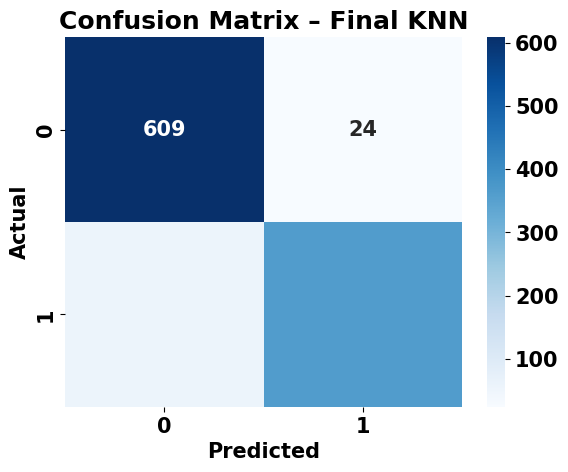

In [289]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix – Final KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**ROC Curve for KNN**

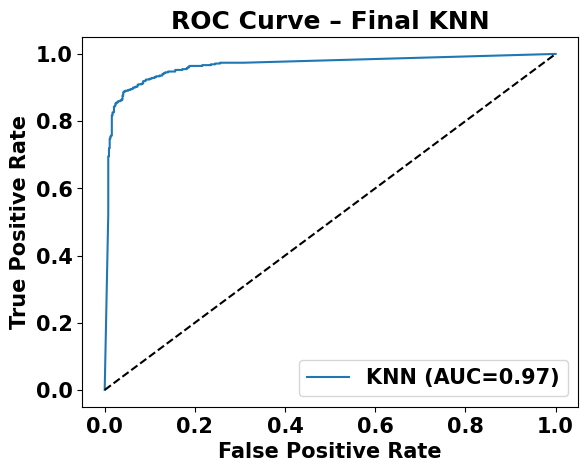

In [290]:
y_prob_knn=knn_final.predict_proba(X_test_scaled)[:,1]
fpr_knn,tpr_knn,_=roc_curve(y_test,y_prob_knn)
auc_knn=auc(fpr_knn,tpr_knn)
plt.plot(fpr_knn,tpr_knn,label=f'KNN (AUC={auc_knn:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final KNN")
plt.legend()
plt.show()

In [255]:
best_params=rand.best_params_
optimal_k=best_params['n_neighbors']
optimal_k

6

**KDTree**

In [256]:
start=time.time()
knn_kd=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='kd_tree'
)
knn_kd.fit(X_train_scaled,y_train)
train_time_kd=time.time()-start
start=time.time()
y_pred_kd=knn_kd.predict(X_test_scaled)
pred_time_kd=time.time()-start

**Metrics**

In [257]:
acc_kd,prec_kd,rec_kd,f1_kd,sp,fpr,cm=compute_metrics(y_test,y_pred_kd)
print("Final KDtree Metrics")
print("Accuracy:",acc_kd)
print("Precision:",prec_kd)
print("Recall:",rec_kd)
print("F1 Score:",f1_kd)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final KDtree Metrics
Accuracy: 0.9230769230769231
Precision: 0.937984496124031
Recall: 0.8642857142857143
F1 Score: 0.8996282527881042
Specificity: 0.9620853080568721
False Positive Rate: 0.037914691943127965
Training Time: 0.0016140937805175781
Prediction Time: 0.040711164474487305


**BallTree**

In [258]:
start=time.time()
knn_bt=KNeighborsClassifier(
    n_neighbors=optimal_k,
    weights=best_params['weights'],
    metric=best_params['metric'],
    algorithm='ball_tree'
)
knn_bt.fit(X_train_scaled,y_train)
train_time_bt=time.time()-start
start=time.time()
y_pred_bt=knn_bt.predict(X_test_scaled)
pred_time_bt=time.time()-start

**Metrics**

In [259]:
acc_bt,prec_bt,rec_bt,f1_bt,sp,fpr,cm=compute_metrics(y_test,y_pred_bt)
print("Final Balltree Metrics")
print("Accuracy:",acc_bt)
print("Precision:",prec_bt)
print("Recall:",rec_bt)
print("F1 Score:",f1_bt)
print("Specificity:",sp)
print("False Positive Rate:",fpr)
print("Training Time:",train_time)
print("Prediction Time:",pred_time)

Final Balltree Metrics
Accuracy: 0.9230769230769231
Precision: 0.937984496124031
Recall: 0.8642857142857143
F1 Score: 0.8996282527881042
Specificity: 0.9620853080568721
False Positive Rate: 0.037914691943127965
Training Time: 0.0016140937805175781
Prediction Time: 0.040711164474487305


**Training vs Validation**

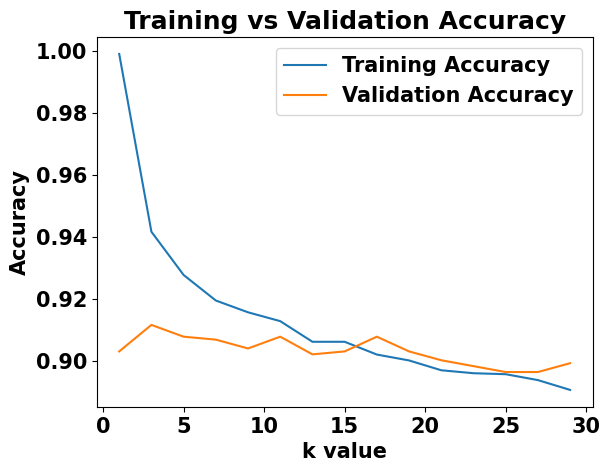

In [291]:
train_acc=[]
val_acc=[]
k_values=range(1,31,2)
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    train_acc.append(knn.score(X_train_scaled,y_train))
    val_acc.append(knn.score(X_test_scaled,y_test))
plt.plot(k_values,train_acc,label='Training Accuracy')
plt.plot(k_values,val_acc,label='Validation Accuracy')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

**Cross Validation Scores**

In [292]:
gnb_scores=cross_val_score(
    GaussianNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [262]:
mnb_scores=cross_val_score(
    MultinomialNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [263]:
bnb_scores=cross_val_score(
    BernoulliNB(),
    X_train,
    y_train,
    cv=skf,
    scoring='accuracy'
)


In [264]:
knn_kd_scores=cross_val_score(
    knn_kd,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

In [265]:
knn_bt_scores=cross_val_score(
    knn_bt,
    X_train_scaled,
    y_train,
    cv=skf,
    scoring='accuracy'
)

**One way ANOVA Test**

In [266]:
from scipy.stats import f_oneway
F_stat,p_value=f_oneway(
    gnb_scores,
    mnb_scores,
    bnb_scores,
    knn_kd_scores,
    knn_bt_scores
)

print("F-statistic:",F_stat)
print("p-value:",p_value)

F-statistic: 45.94729127399864
p-value: 8.304162023609803e-10


**Mean Accuracy to find the best model**

In [267]:
print("Gaussian NB Mean Accuracy:",gnb_scores.mean())
print("Multinomial NB Mean Accuracy:",mnb_scores.mean())
print("Bernoulli NB Mean Accuracy:",bnb_scores.mean())
print("KNN KDTree Mean Accuracy:",knn_kd_scores.mean())
print("KNN BallTree Mean Accuracy:",knn_bt_scores.mean())

Gaussian NB Mean Accuracy: 0.8270486870348452
Multinomial NB Mean Accuracy: 0.7934637605568818
Bernoulli NB Mean Accuracy: 0.888503781419888
KNN KDTree Mean Accuracy: 0.9106782483098959
KNN BallTree Mean Accuracy: 0.9106782483098959


In [268]:
best_model=max(
    [
        ("Gaussian NB",gnb_scores.mean()),
        ("Multinomial NB",mnb_scores.mean()),
        ("Bernoulli NB",bnb_scores.mean()),
        ("KNN KDTree",knn_kd_scores.mean()),
        ("KNN BallTree",knn_bt_scores.mean())
    ],
    key=lambda x:x[1]
)

print("Best Model:",best_model)

Best Model: ('KNN KDTree', 0.9106782483098959)
